# Formation Python Scientifique SYMME

## Formation du 02/12/2017, Maison de la Mécatronique, salle 221

## Python: pourquoi ? Comment ? 

* Python pour les scientifiques ?
* Python installé sur votre machine ?
* Interfaces Spyder et Jupyter

##  Une brève entrée en matière
Syntaxe basique, execution, Jupyter, besoin de librairies ...
    

In [1]:
print "Hello SYMME"


Hello SYMME


In [2]:
2 + 2

4

In [3]:
def fonc(x, tau = 10., gamma = 1):
    """
    Une fonction
    """
    return exp(-x/tau) * sin(gamma * x**2)

x = [1,2,3]
y = fonc(x)

NameError: global name 'exp' is not defined

## Présentation du kit de survie du petit scientifique
Python += Numpy, Sicpy, Matplotlib, Pandas

### Quelques activités graphiques

#### Tracé d'une courbe simple

$$
f(x) = \exp\left(\dfrac{-x}{\tau}\right)\times\sin(\gamma x^2)
$$

<IPython.core.display.Javascript object>


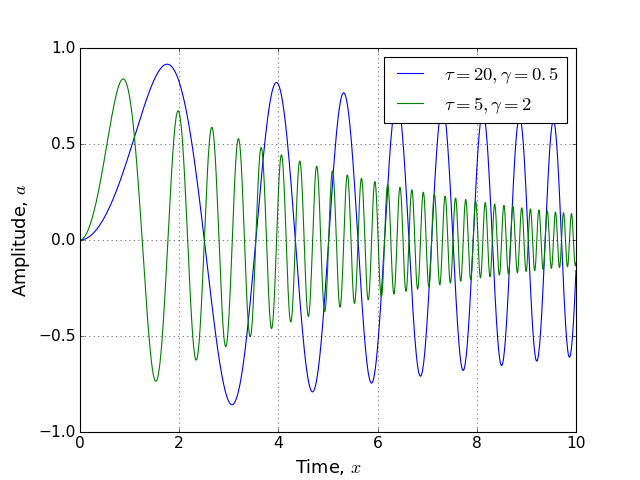

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'lines.markersize': 8, 'axes.labelsize': 16})
%matplotlib nbagg

def fonc(x, tau = 10., gamma = 1):
    """
    Une fonction
    """
    return np.exp(-x/tau) * np.sin(gamma * x**2)

x = np.linspace(0., 10., 1000)

fit = plt.figure()
plt.plot(x, fonc(x, tau=20, gamma = .5), label = r"$\tau = 20, \gamma = 0.5$")
plt.plot(x, fonc(x, tau=5, gamma = 2), label = r"$\tau = 5, \gamma = 2$")
plt.legend()
plt.grid()
plt.xlabel("Time, $x$")
plt.ylabel("Amplitude, $a$")
plt.show()


#### Tracé de lignes de champ

Par exemple, le champ électrostatique de plusieurs particules $p_i$ de champ unitaire:

$$
\vec E_i(x, y) = \dfrac{1}{4\pi\epsilon}\frac{q_i}{r_i^2}\vec e_{ri}
$$


<IPython.core.display.Javascript object>


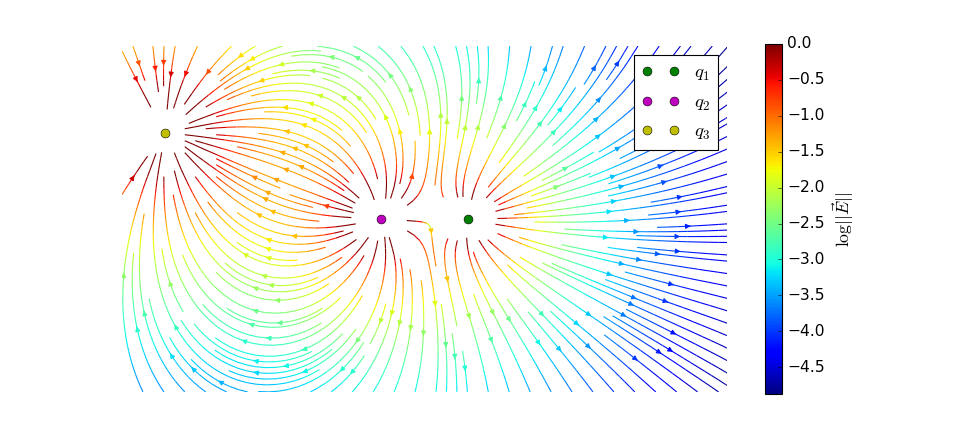

In [20]:
def E(qi, xi, yi, x, y, epsilon = 1., cut = .2):
    vri = np.array([x-xi, y-yi])
    ri = (vri**2).sum(axis = 0)**.5
    ei = vri / ri
    Ei = 1. / (4. * np.pi * epsilon) * qi / ri**2 * ei
    return np.where(ri < cut, np.nan, Ei)

xi1, yi1 = .5, 0.
xi2, yi2 = -.5, 0.
xi3, yi3 = -3, 1.
q1, q2, q3 = 1, 2, -4

x = np.linspace(-3.5, 3.5, 50)
y = np.linspace(-2, 2, 50)

X, Y = np.meshgrid(x,y)

E = E(q1, xi1, yi1, X, Y) + E(q2, xi2, yi2, X, Y) + E(q3, xi3, yi3, X, Y) 
nE = (E**2).sum(axis =0)**.5
nE = np.log(np.where(nE > 1, 1., nE))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
plt.streamplot(X, Y, E[0], E[1], density = [2., 2.], color=nE, linewidth=1, cmap=plt.cm.jet)
#plt.grid()
plt.axis('off')
plt.xlim(-3.5, 3.5)
plt.ylim(-2., 2.)
plt.plot([xi1], [yi1], "go", label = "$q_1$")
plt.plot([xi2], [yi2], "mo", label = "$q_2$")
plt.plot([xi3], [yi3], "yo", label = "$q_3$")
cbar = plt.colorbar()
plt.legend()
cbar.set_label(r"$\log||\vec E||$")
plt.show()


## Données tabulaires avec pandas


In [24]:
data = np.random.rand(10000, 4)
df = pd.DataFrame(data)
df.describe()

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.501714,0.501740,0.504364,0.499907
std,0.288740,0.290754,0.288287,0.288562
min,0.000012,0.000048,0.000108,0.000128
25%,0.251100,0.251036,0.254026,0.252476
50%,0.503915,0.503924,0.508149,0.500934
75%,0.749852,0.757444,0.752702,0.747830
max,0.999934,0.999840,0.999767,0.999963


## Calcul scientifique basique avec Scipy

### Jeux avec des équations différentielles "ordinaires" (linéaires ou pas !)

Par exemple:

$$
\ddot x + 2 \zeta  \omega_0 \dot x + \omega_0^2 x = \ddot x_d
$$

<IPython.core.display.Javascript object>


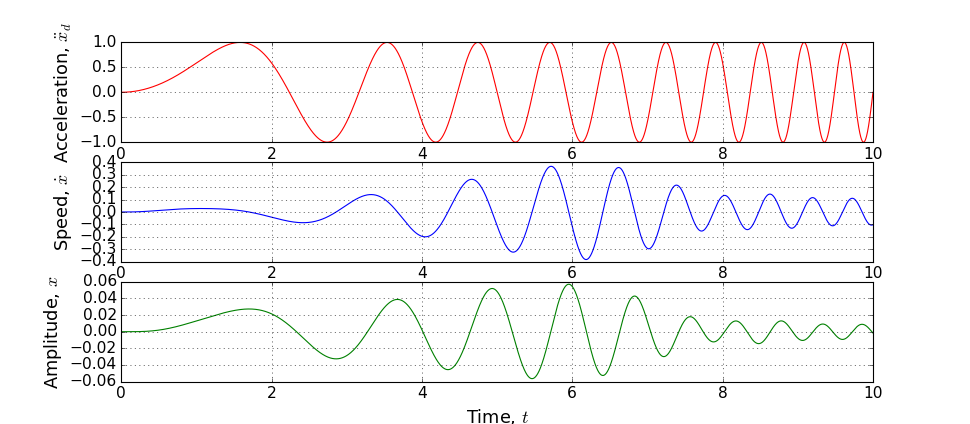

In [53]:
from scipy.integrate import odeint

zeta = .2
omega0 = 2. * np.pi
omegad = .5 * omega0
X0 = [0, 0]
t = np.linspace(0., 10., 10000)

def ddotxd(t):
    """
    Sweep excitation
    """
    return np.sin(omegad * t * (1. * t/5.))

def eq(X, t):
    """
    ODE
    """
    x = X[0]
    dotx = X[1]
    dotX = np.zeros_like(X)
    ddotx = ddotxd(t) -2 *zeta *omega0 * dotx - omega0**2 * x
    dotX[0] = dotx
    dotX[1] = ddotx
    return dotX

sol = odeint(eq, X0, t)
fig = plt.figure()
ax = fig.add_subplot(3, 1, 1)
plt.plot(t, ddotxd(t), "r-")
plt.grid()
plt.ylabel("Acceleration, $\ddot x_d$")
ax = fig.add_subplot(3, 1, 2)
plt.plot(t, sol[:,1], "b-")
plt.grid()
plt.ylabel("Speed, $ \dot x$")
ax = fig.add_subplot(3, 1, 3)
plt.plot(t, sol[:,0], "g-")
plt.grid()
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $x$")
plt.show()